In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/Ecommerce_Customers.csv')

In [ ]:
df.sample(5, random_state=5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
241,karenosborne@yahoo.com,"81814 Pratt Squares Suite 460\nNorth Robert, G...",SlateBlue,32.686245,12.638572,36.097221,4.297737,571.471034
448,flevine@gmail.com,5292 Melanie Crescent Apt. 064\nFischerborough...,AliceBlue,32.204655,12.480702,37.680288,3.279466,478.584286
75,langmatthew@hotmail.com,"606 Perez Drives\nMaryside, CO 94387-5877",DimGray,32.049839,12.238057,38.730862,3.120569,478.719357
212,baldwinbryan@estrada-silva.biz,"1470 Kathleen Pass\nSouth Christopherberg, SD ...",MediumSeaGreen,33.304431,12.378490,38.764297,3.843849,536.130897
481,autumn88@mendoza-mills.com,"214 Obrien Lakes Suite 572\nSouth Jeremy, KS 5...",MediumOrchid,32.047815,12.482670,35.536025,3.393903,497.389558


In [55]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:

X= df.drop(['Yearly Amount Spent','Avg. Session Length','Email','Address','Avatar'], axis=1)
y= df['Yearly Amount Spent']

In [ ]:
X.head()

,Time on App,Time on Website,Length of Membership
0,12.655651,39.577668,4.082621
1,11.109461,37.268959,2.664034
2,11.330278,37.110597,4.104543
3,13.717514,36.721283,3.120179
4,12.795189,37.536653,4.446308


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot

fig = px.scatter_matrix(
    df,
    dimensions=df.select_dtypes(include="number").columns,
    height=950,
    color="Yearly Amount Spent",
    opacity=0.65,
    title= "Relationships Between Numerical Data",
    template="plotly_dark"

)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

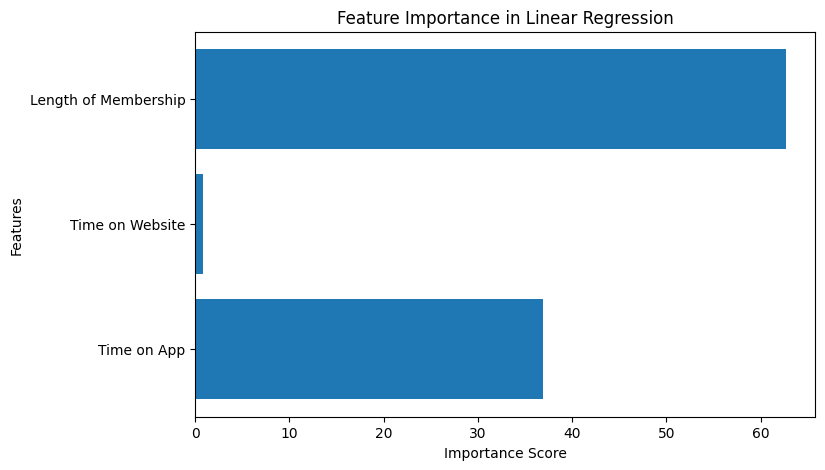

In [51]:
import matplotlib.pyplot as plt

importance = model.coef_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=101)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [46]:
kf = KFold(n_splits=25, shuffle=True, random_state=99)
scores = cross_val_score(model, X, y, cv=kf)
print(f"Model Score: {np.mean(scores) * 100:.2f}%")

Model Score: 87.16%


In [47]:
predictions= model.predict(X_test)

In [49]:
d = {
    "Actual_Yearly_Spent": y_test,
    "Predicted_Yearly_Spent": predictions
}
predected_df = pd.DataFrame(d)

predected_df.head()

,Actual_Yearly_Spent,Predicted_Yearly_Spent
18,452.315675,472.220004
361,401.033135,431.896187
104,410.069611,454.566479
4,599.406092,584.316618
156,586.155870,611.151904


In [54]:
import numpy as np

def predict_spending(model):

    time_on_website = float(input("Enter Time on Website: "))
    time_on_app = float(input("Enter Time on App: "))
    length_of_membership = float(input("Enter Length of Membership (years): "))


    custom_input = np.array([[time_on_website, time_on_app, length_of_membership]])


    predicted_amount = model.predict(custom_input)

    print(f"Predicted Yearly Amount Spent: Rs.{predicted_amount[0]:.2f}")


predict_spending(model)


Enter Time on Website: 11
Enter Time on App: 11
Enter Length of Membership (years): 11
Predicted Yearly Amount Spent: Rs.906.14


In [53]:
model.predict([[22,55,10]])

array([1286.78874029])